In [1]:
from scripts import regression, plot_utils
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']

In [2]:
FIELD = 'CS'

color_mapping = {'CS': ('#5777D9', '#293866'), 
                 'Business': ('#CC3A35', '#661D1B'), 
                 'History': ('#8BCC60', '#466630')}

plot_utils.ACCENT_COLOR, plot_utils.ALMOST_BLACK = color_mapping[FIELD]

In [3]:
FILE_ENDING = 'adj' # 'raw'

# Pull out a particular coefficient from the regression
LABEL = 'i_t:C(t)[%d]'

# Range of productivity measure (in terms of kid time)
T = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]; 

In [4]:
# Build model for men:
df_m = pd.read_csv('../data/treated/%s_publication_outcomes_men_%s_apr29_raw.tsv' % (FILE_ENDING, FIELD.lower()), 
                   sep='\t')
# df_m['cumulative'] = df_m.groupby(['i', 'round'])['y'].cumsum()
mod_m = regression.build_model(df_m, t_val=None)
alpha_m = [mod_m.params[LABEL % t] for t in T]
productivity_m = [df_m[df_m['t'] == t]['y'].mean() for t in T]

In [5]:
# Build model for women:
df_w = pd.read_csv('../data/treated/%s_publication_outcomes_women_%s_apr29_raw.tsv' % (FILE_ENDING, FIELD.lower()), 
                   sep='\t')
# df_w['cumulative'] = df_w.groupby(['i', 'round'])['y'].cumsum()
mod_w = regression.build_model(df_w, t_val=None)
alpha_w = [mod_w.params[LABEL % t] for t in T]
productivity_w = [df_w[df_w['t'] == t]['y'].mean() for t in T]

In [6]:
# Get the expectation of the conditional productivity probability
expectation_w = [np.mean(regression.build_model(df_w, t_val=t).predict()) for t in T]
expectation_m = [np.mean(regression.build_model(df_m, t_val=t).predict()) for t in T]
#expectation_w = productivity_w; expectation_m = productivity_m;

In [7]:
# These expectations should look fairly similar to the average productivity
eps = 0.05
assert all([abs(expectation_w[i] - productivity_w[i]) < eps for i in range(len(T))])
assert all([abs(expectation_m[i] - productivity_m[i]) < eps for i in range(len(T))])

<ipython-input-8-ec8285163f8e>:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('../plots/event_study/expectations_real_%s_%s.pdf' % (FILE_ENDING, FIELD.lower()),


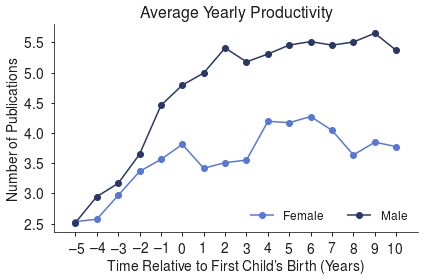

In [8]:
# Plot it:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=plot_utils.SINGLE_FIG_SIZE)
ax.plot(T, expectation_w, label='Female', linestyle='-', marker='o', color=plot_utils.ACCENT_COLOR)
ax.plot(T, expectation_m, label='Male', linestyle='-', marker='o', color=plot_utils.ALMOST_BLACK)
# Add text
ax.set_title("Average Yearly Productivity", fontsize=plot_utils.TITLE_SIZE)
ax.set_xlabel("Time Relative to First Child's Birth (Years)")
ax.set_ylabel("Number of Publications")
ax.legend(loc='lower right', fontsize=plot_utils.LEGEND_SIZE, frameon=False, ncol=2)
ax.set_xlim(-6, 11)
ax.set_xticks(range(-5, 11))
#ax.set_ylim(0, 6)
# Add styling and save
plot_utils.finalize(ax)
plt.tight_layout()
plt.savefig('../plots/event_study/expectations_real_%s_%s.pdf' % (FILE_ENDING, FIELD.lower()), 
            dpi=1000, figsize=plot_utils.SINGLE_FIG_SIZE)

In [9]:
# Construct the relative productivity (effect of year t / expectation @ year t)
rel_productivity_w = np.array([alpha_w[i]/expectation_w[i] for i in range(len(T))])
rel_productivity_m = np.array([alpha_m[i]/expectation_m[i] for i in range(len(T))])

In [10]:
rel_productivity_w[6], alpha_w[6], alpha_w[6]/(expectation_w[5])

(-0.1610213142161072, -0.5501254645794136, -0.1443000282628325)

In [11]:
rel_productivity_m[6], alpha_m[6], alpha_m[6]/(expectation_m[5])

(0.03338982566869481, 0.16674695036291895, 0.03478278317936655)

In [12]:
# Construct the "child penalty"
child_penalty = [float(alpha_m[i]-alpha_w[i])/float(expectation_w[i]) for i in range(len(alpha_w))]
long_run_delta = child_penalty[len(child_penalty) - 1]
# Add some notion of variance
N_samples = 10

In [13]:
child_penalty[6], long_run_delta, float(alpha_m[6]-alpha_w[6])/float(expectation_w[5])

(0.20982802253580413, 0.2878909327275696, 0.18803839559782962)

In [14]:
float(alpha_w[15]-alpha_m[15])/float(expectation_w[15])

-0.2878909327275696

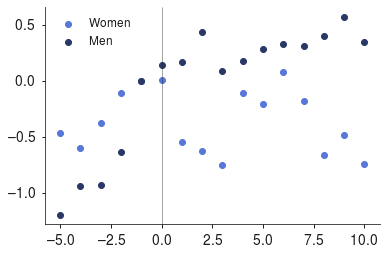

In [15]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=plot_utils.SINGLE_FIG_SIZE)
plt.scatter(T, np.array([alpha_w[i] for i in range(len(T))]), label='Women', color=plot_utils.ACCENT_COLOR)
plt.scatter(T, np.array([alpha_m[i] for i in range(len(T))]), label='Men', color=plot_utils.ALMOST_BLACK)
plt.axvline(0, alpha=0.4, linewidth=1)
plt.legend(frameon=False, fontsize=plot_utils.LEGEND_SIZE)
plot_utils.finalize(ax)
plt.show()

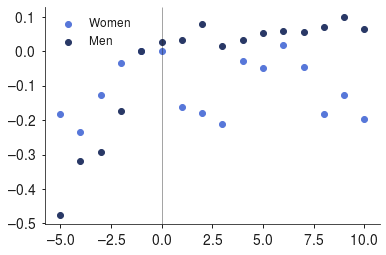

In [16]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=plot_utils.SINGLE_FIG_SIZE)
plt.scatter(T, rel_productivity_w, label='Women', color=plot_utils.ACCENT_COLOR)
plt.scatter(T, rel_productivity_m, label='Men', color=plot_utils.ALMOST_BLACK)
plt.axvline(0, alpha=0.4, linewidth=1)
plt.legend(frameon=False, fontsize=plot_utils.LEGEND_SIZE)
plot_utils.finalize(ax)
plt.show()

<ipython-input-17-794737dd2a7c>:31: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('../plots/event_study/child_penalty_real_%s_%s.pdf' % (FILE_ENDING, FIELD.lower()), dpi=1000,


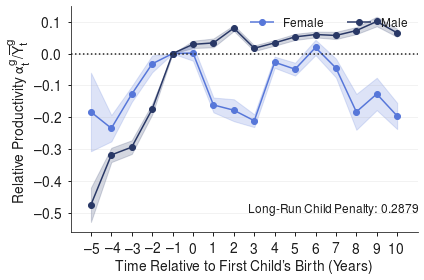

In [17]:
#
# Plot the penalty as a function of time and calculate the long-run impact
#
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=plot_utils.SINGLE_FIG_SIZE)
ax.plot(T, rel_productivity_w, label='Female', linestyle='-', marker='o', color=plot_utils.ACCENT_COLOR)
err_w = regression.get_bootstrap_interval(df_w, N_samples)
ax.fill_between(T, rel_productivity_w-2*err_w, rel_productivity_w+2*err_w, color=plot_utils.ACCENT_COLOR, 
                alpha=0.2)

ax.plot(T, rel_productivity_m, label='Male', linestyle='-', marker='o', color=plot_utils.ALMOST_BLACK)
err_m = regression.get_bootstrap_interval(df_m, N_samples)
ax.fill_between(T, rel_productivity_m-2*err_m, rel_productivity_m+2*err_m, color=plot_utils.ALMOST_BLACK, 
                alpha=0.2)
ax.grid(which='major', axis='y', alpha=0.2)
ax.axhline(y=0, ls=":")
ax.set_xlim(-6, 11)
#ax.set_ylim(-0.75, 0.55)

# Add text
# ax.set_title("Impact of Childbirth on Productivity", fontsize=plot_utils.TITLE_SIZE)
ax.set_ylabel(r"Relative Productivity $\alpha_{t}^{g}/\overline{Y}_{t}^{g}$", fontsize=plot_utils.TITLE_SIZE)
ax.set_xlabel("Time Relative to First Child's Birth (Years)")
ax.text(1, 0.1, 'Long-Run Child Penalty: %.4f' % long_run_delta, ha='right', va='center', 
        transform=ax.transAxes, fontsize=plot_utils.LEGEND_SIZE)
ax.legend(loc='upper right', fontsize=plot_utils.LEGEND_SIZE, frameon=False, ncol=2)
ax.set_xlim(-6, 11)
ax.set_xticks(range(-5, 11))
# Add styling and save
plot_utils.finalize(ax)
plt.tight_layout()
plt.savefig('../plots/event_study/child_penalty_real_%s_%s.pdf' % (FILE_ENDING, FIELD.lower()), dpi=1000, 
            figsize=plot_utils.SINGLE_FIG_SIZE)